# Data Access & Visualization Demo
# Transiting Exoplanet Survey Satellite (TESS) + Kepler Space Telescope

[Dr. Victor Pankratius](http://www.victorpankratius.com), MIT<br><br>
[Github Python Teaching Repository](https://github.com/vpankratius/teaching/tree/master/python)

Light curves from TESS Data Alerts, source: https://archive.stsci.edu/prepds/tess-data-alerts <br>
Light curves from NASA Kepler Space Telescope, ource: https://keplerscience.arc.nasa.gov<br>

Prerequisites: 

This notebook shows how to use the Scikit Data Access package (developed by Pankratius group at MIT) to access TESS data and Kepler data in Python. You can find more info, demos, and available data sets at:

https://github.com/MITHaystack/scikit-dataaccess

Start by installing these packages from your terminal to enable data access (assuming Anaconda distribution):

- sudo conda install gdal
- sudo pip  install git+https://github.com/usgs/geomag-algorithms.git
- sudo conda install pyproj
- sudo pip install scikit-dataaccess

Install these packages to enable the spiral plot visualizations (from Scikit Discovery):

- sudo conda install basemap
- sudo pip install scikit-discovery

<hr>


The MIT License (MIT)
Copyright (c) 2019 Massachusetts Institute of Technology

Authors: Victor Pankratius
This software has been created in projects supported by the US National
Science Foundation and NASA (PI: Pankratius)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

<hr>

# TESS Data Access Demo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 150

Import Scikit Data Access

In [2]:
from skdaccess.astro.tess.data.cache import DataFetcher as TESS_DF
from skdaccess.framework.param_class import *

Next, you need a Data Fetcher for TESS data (try TICIDs with available FITS files from https://archive.stsci.edu/prepds/tess-data-alerts/, e.g., 25375553, 70440470, etc.)

In [3]:
myTESSid=25375553

In [4]:
tess_fetcher = TESS_DF([AutoList([myTESSid])])
tess_dw = tess_fetcher.output()

Get the real data

In [5]:
label, data = next(tess_dw.getIterator())

The following block normalizes flux in your data w.r.t its median

In [6]:
valid_index = data['PDCSAP_FLUX'] != 0.0
data.loc[valid_index, 'RELATIVE_PDCSAP_FLUX'] = data.loc[valid_index, 'PDCSAP_FLUX'] / np.median(data.loc[valid_index, 'PDCSAP_FLUX'])

In [7]:
myTESSdata=data.loc[valid_index, 'RELATIVE_PDCSAP_FLUX']

Plot the data

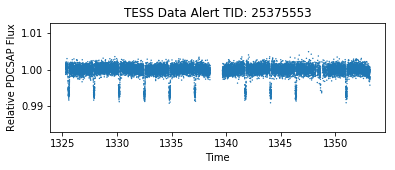

In [8]:
plt.gcf().set_size_inches(6,2);
plt.scatter(data.loc[valid_index, 'TIME'], myTESSdata, s=2, edgecolor='none');
plt.xlabel('Time');
plt.ylabel('Relative PDCSAP Flux');
plt.title('TESS Data Alert TID: ' + str(int(label)));

show a piece of the data

In [9]:
myTESSdata.head()

1    0.999545
2    0.999121
3    0.998653
4    1.001724
5    1.001607
Name: RELATIVE_PDCSAP_FLUX, dtype: float64

### Create a spiral plot to discover periodicity / transits visually
(Info on spiral plots: http://dx.doi.org/10.1109/INFVIS.2001.963273 )

For time series data $s(t)$, plot radius $r(t)=t-t_0$, angle $\theta(t)=2\pi / T * r(t)$, with color $z(t)=s(t)$

In [10]:
from skdiscovery.visualization import spiral_plot

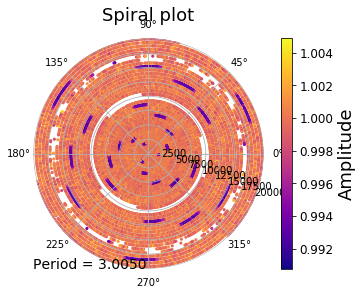

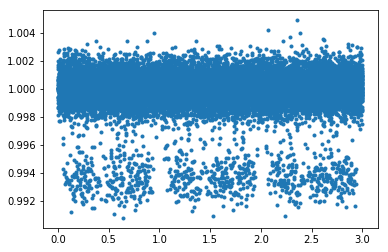

In [11]:
spiral_plot.run_spiral(myTESSdata, period = 3.005,plotTS=True)

In [12]:
from skdiscovery.visualization import fourier_plot, emd_plot, wavelets_plot, linear_decomposition_plot

### Analyze frequencies in a Fourier Plot

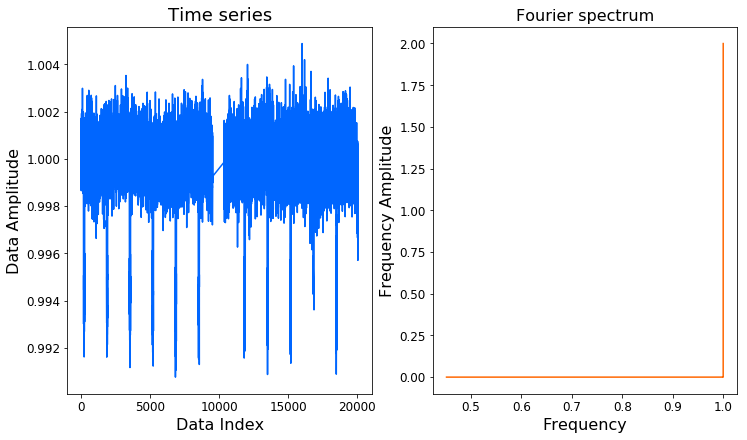

In [13]:
fourier_plot.run_plotDFT(myTESSdata);

### Empirical Mode Decomposition / Hilbert Huang Transform
Works with non-stationary, non-linear processes.

Decomposes data into Intrinsic Mode Functions (IMFs), representing complete and typically orthogonal basis for original function. IMFs have certain properties, see https://en.wikipedia.org/wiki/Hilbert–Huang_transform
. When an IMF is computed, it is subtracted from the original dataset, then next one is computed on the remainder, and so on ("sifting process"). 


/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


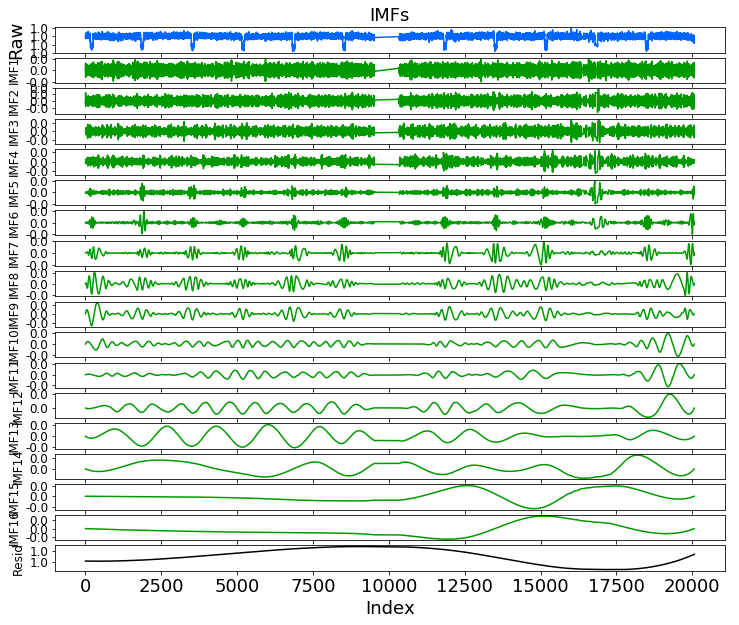

In [14]:
emd_plot.run_plotImfs(myTESSdata);

/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


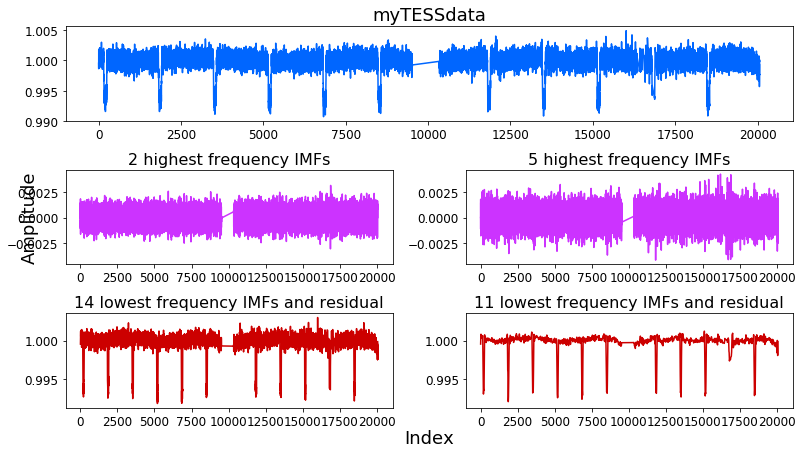

In [15]:
splitdata = emd_plot.run_plotImfsSplitComp(myTESSdata, highNums = [2, 5], mainTitle = 'myTESSdata')

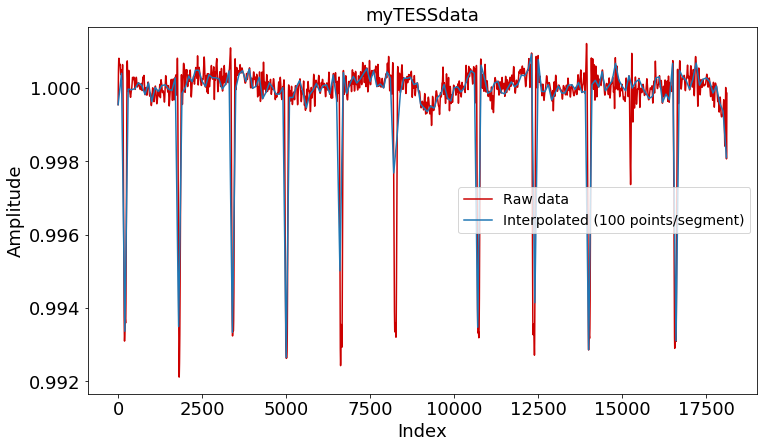

In [16]:
low5 = splitdata[3]
low5Lin = linear_decomposition_plot.plot_lin_interp(low5, mainTitle = 'myTESSdata')

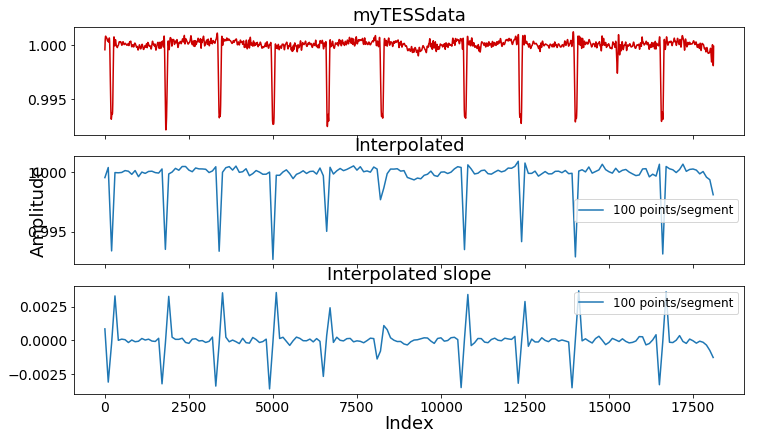

In [17]:
low5Slopes = linear_decomposition_plot.plot_lin_slope(low5, mainTitle = 'myTESSdata')

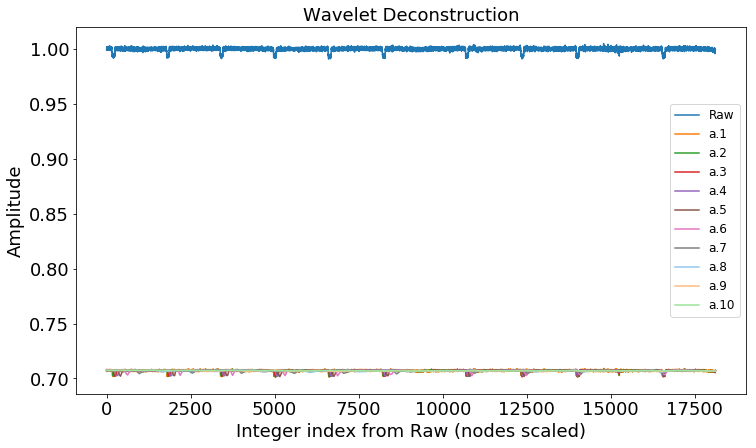

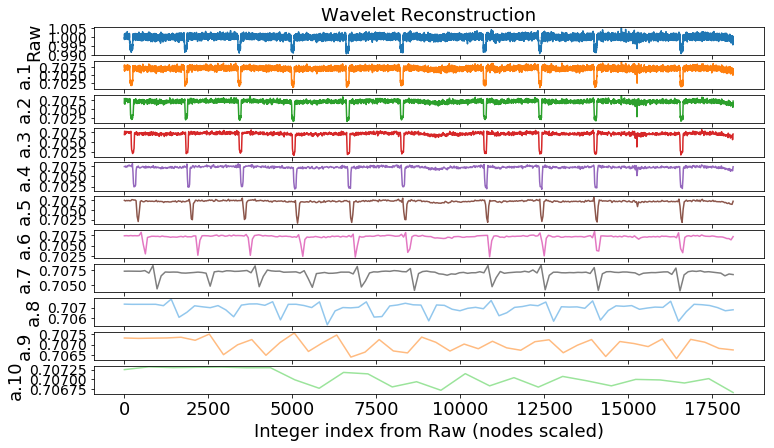

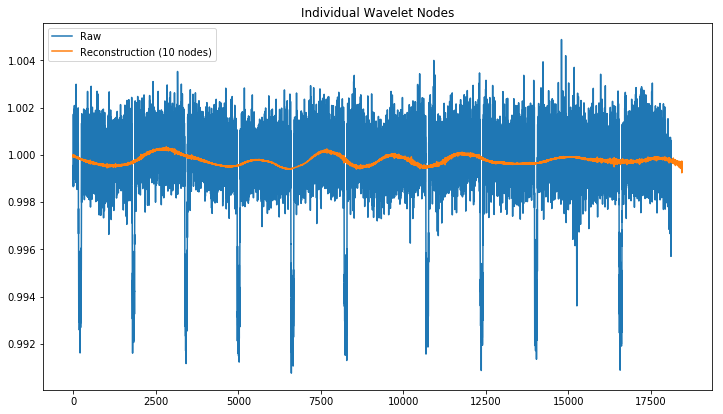

In [18]:
wavelets_plot.run_plotWPDecon(myTESSdata, wavelet = 'db5')
wavelets_plot.run_plotWPShowall(myTESSdata, wavelet = 'db5')
wavelets_plot.run_plotWPRecon(myTESSdata, wavelet = 'db5')

<hr><br>

# Kepler Data Access Demo

Light curves for stars imaged by the NASA Kepler Space Telescope <br>
Source: https://keplerscience.arc.nasa.gov<br>

In [19]:
from skdaccess.astro.kepler import DataFetcher as Kepler_DF
from skdaccess.utilities.kepler_util import normalize
from skdaccess.framework.param_class import *
import numpy as np

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [20]:
myKeplerID='009941662'

In [21]:
kepler_fetcher = Kepler_DF([AutoList([myKeplerID])])
kepler_data = kepler_fetcher.output().get()

In [22]:
normalize(kepler_data[myKeplerID])

In [23]:
kepler_data[myKeplerID].head()

,TIME,TIMECORR,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2,QUARTER
CADENCENO,,,,,,,,,,,,,,,,,,,,
568,120.539195,0.001042,1778533.750,33.049557,4841.642090,1.547178,0.995571,32.609024,0,NaN,NaN,NaN,NaN,388.145900,0.000016,584.520993,0.000033,0.001739,0.004915,0
569,120.559629,0.001043,1778263.875,33.047188,4846.805664,1.546246,0.995457,32.732418,0,NaN,NaN,NaN,NaN,388.145706,0.000016,584.521052,0.000033,0.001479,0.005044,0
570,120.580063,0.001044,1778347.750,33.048054,4848.539062,1.549641,0.995509,32.837833,0,NaN,NaN,NaN,NaN,388.145651,0.000016,584.520732,0.000033,0.001246,0.004843,0
571,120.600498,0.001044,1778901.000,33.052914,4847.870117,1.543734,0.995785,32.684124,0,NaN,NaN,NaN,NaN,388.145187,0.000016,584.520714,0.000033,0.000877,0.004590,0
572,120.620932,0.001045,1781658.250,33.081059,4852.192871,1.546612,0.997348,32.769455,0,NaN,NaN,NaN,NaN,388.145210,0.000016,584.520569,0.000033,0.000517,0.004524,0


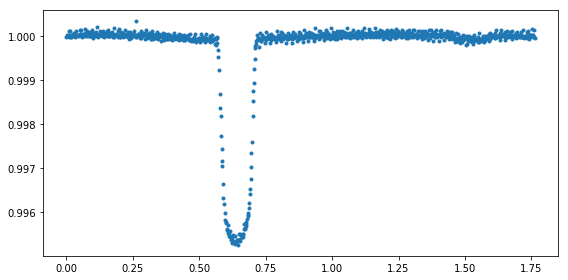

In [24]:
plt.figure(figsize=(8,4));
data = kepler_data[myKeplerID].iloc[0:1000]
plt.plot(np.array(data['TIME']) % 1.7636, data['PDCSAP_FLUX'],'.');
plt.tight_layout();